In [35]:
from  scipy.stats  import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# pip install pysabr
import pysabr

# pip install QuantLib
import QuantLib

from sources.plotter import Plotter
from sources.hestonmodelsimulation import HestonModelAssetSimulation
from sources.sabrmodelsimulation import SABR_model_simulation
from sources.blackscholesmodel import BlackScholes

Plotter = Plotter()
BlackScholes = BlackScholes()

## 2.1 SV models

Exercise 10 (Stochastic volatility). Choose one of the models, Heston or
SABR. Simulate the paths to maturity T = 1 year.
1. Plot a single path and look if you can observe a volatility clustering.
2. Plot histograms of log-returns and compare them to the normal distribution with the same mean and variance. Observe the skewness and fat
tails.

Heston model describes a model where the evolution of a the volatility of an underlyin g essat is NOT constant, nor even deterministic, but follows a random process. 



### 2.1 SV models: Heston and SABR

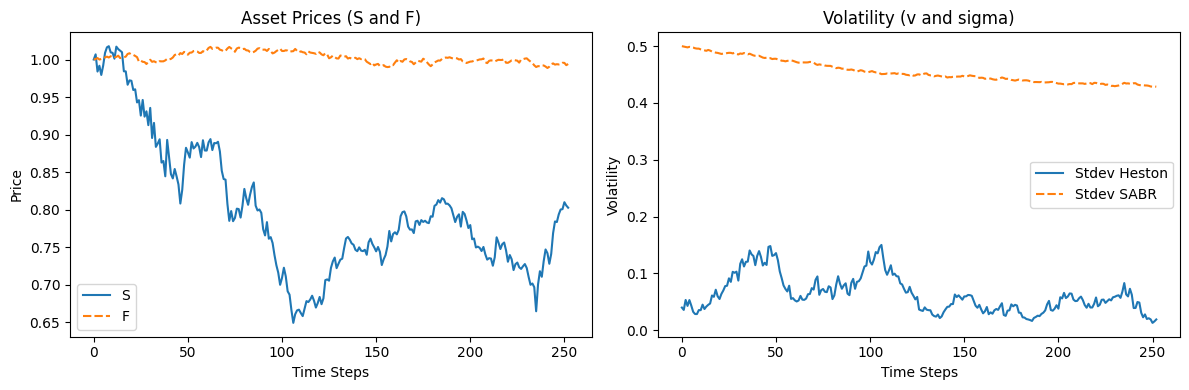

In [95]:
# Number of simulations:
M = 1000

# Number of days (years)
T = 1 
n_steps = 252

# Heston Model: 
S0 = 1.0
rf_rate = 0
variance_0 = 0.2**2
# variance_0 = 0.5
theta = variance_0
correlation = -0.7
kappa = 3
sigma = 0.6

HestonModel = HestonModelAssetSimulation(rf_rate=rf_rate)
S, v = HestonModel.heston_model_sim(S0= S0, v0=variance_0,rho=correlation, kappa = kappa, theta = theta, sigma = sigma, T=T, N=n_steps, M=M)

# SABR model:
# Settings:
F0 = 1.0
r = 0.0
beta = 1
rho = -0.7
alpha = 0.5

SABR_model = SABR_model_simulation()
F, sigma = SABR_model.sabr_model_sim(F0, rho, beta, alpha, T, n_steps, M)
Plotter.plot_2curves(S, F, sigma, v)

### 2.1: SV model: log returns

In [20]:
def calc_logreturns(data):
    log_returns = np.log(data[1:] / data[:-1])
    return log_returns

# Calculate log returns for Heston and SABR models
heston_logreturns = np.empty_like(S)
sabr_logreturns = np.empty_like(F)

for i in range(S.shape[1]):
    heston_logreturns[:-1, i] = calc_logreturns(S[:, i])
    sabr_logreturns[:-1, i] = calc_logreturns(F[:, i])

# Plotter.plot_hist(heston_logreturns, sabr_logreturns)
# Plotter.plot_2logcurves(heston_logreturns, sabr_logreturns,0)

## 2.2 SV models:  Option prices and implied volatilities for SABR model.
Consider European calls and puts on the underlying that follows your SABR process.
Compute ATM, +/-10 % and +/- 25% ITM and OTM European call and put prices
using Monte Carlo simulations code from the previous exercise for SABR. Compute
these prices also using the regular Black-Scholes formula. Think of what would be a
realistic way of providing the volatility in Black-Scholes formula, to facilitate a fair
comparison between SABR and BS (i.e., how would you do this in practice). 

In [139]:
from mpl_toolkits.mplot3d import Axes3D

ValueError: Argument Z must be 2-dimensional.

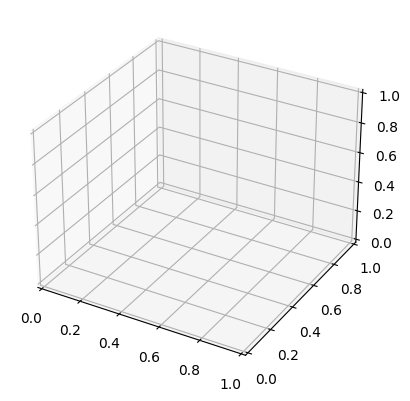

In [146]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming F and sigma are 2D arrays with same shape
# and T is a scalar or a 1D array that matches one of the dimensions of F and sigma
# Adjust the following line according to the actual shapes of your arrays
T_array = np.linspace(0, T, n_steps)

# Create a meshgrid for plotting
F_mesh, T_mesh = np.meshgrid(F[:-1,0], T_array)
sigma_mesh = sigma[:-1,0] # Adjust this if sigma is not already a 2D array matching F_mesh and T_mesh

# Plot surface
ax.plot_surface(F_mesh, T_mesh, sigma_mesh, cmap='viridis')

ax.set_xlabel('Forward Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')

plt.show()

In [148]:
T_mesh

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00398406, 0.00398406, 0.00398406, ..., 0.00398406, 0.00398406,
        0.00398406],
       [0.00796813, 0.00796813, 0.00796813, ..., 0.00796813, 0.00796813,
        0.00796813],
       ...,
       [0.99203187, 0.99203187, 0.99203187, ..., 0.99203187, 0.99203187,
        0.99203187],
       [0.99601594, 0.99601594, 0.99601594, ..., 0.99601594, 0.99601594,
        0.99601594],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [147]:
sigma[:-1,0]

array([0.5       , 0.49955139, 0.49824414, 0.49798309, 0.49847651,
       0.49819099, 0.49690198, 0.4991862 , 0.49745638, 0.49667183,
       0.49705227, 0.49625681, 0.4966365 , 0.49480176, 0.49494717,
       0.49421148, 0.49412432, 0.49440658, 0.49452847, 0.49589321,
       0.49506791, 0.49473951, 0.49424794, 0.49445532, 0.4926616 ,
       0.49108647, 0.48838676, 0.48901613, 0.48982159, 0.49063391,
       0.49078565, 0.49208767, 0.49225762, 0.49055943, 0.49023237,
       0.49048755, 0.49072757, 0.490534  , 0.49098731, 0.49245533,
       0.49262879, 0.49248121, 0.49180029, 0.49230974, 0.49001255,
       0.48935301, 0.48848371, 0.48804352, 0.48783234, 0.48694044,
       0.48661436, 0.48582399, 0.48447857, 0.48438439, 0.48337177,
       0.48412021, 0.4846719 , 0.48435808, 0.48361047, 0.48193142,
       0.48110654, 0.47983645, 0.47967777, 0.47943294, 0.4780298 ,
       0.47784992, 0.47723791, 0.47623509, 0.47634342, 0.47622249,
       0.47584032, 0.47595674, 0.4761545 , 0.47287271, 0.47328

In [145]:
F_mesh.shape

(252, 252)

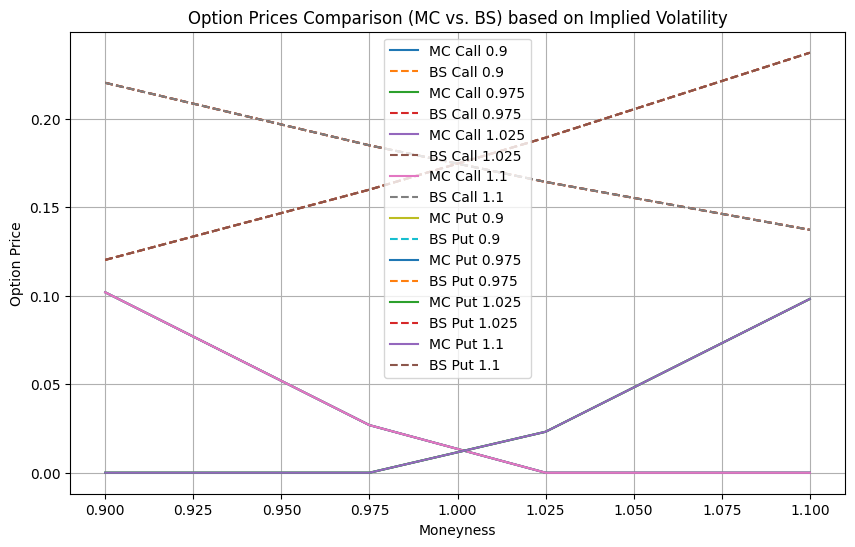

In [138]:
F0 = 1.0
r = 0.0
beta = 1
rho = -0.7
alpha = 0.5

K = F0  # ATM strike price
moneyness_levels = [0.9, 0.975, 1.025, 1.1]  # Moneyness levels for options

SABR_model = SABR_model_simulation()
F, sigma = SABR_model.sabr_model_sim(F0, rho, beta, alpha, T, n_steps, M) 
F_mcsim_mean = np.mean(F[-1, :])
implied_volatility = np.mean(sigma[-1, :])

option_prices_sabr = {}
for moneyness in moneyness_levels:
    K_option = K * moneyness
    option_prices_sabr[f'Call {moneyness}'] = np.mean(np.maximum(F_mcsim_mean - K_option, 0))
    option_prices_sabr[f'Put {moneyness}'] = np.mean(np.maximum(K_option - F_mcsim_mean, 0))

option_prices_bs = {}
for moneyness in moneyness_levels:
    K_option = K * moneyness
    option_prices_bs[f'Call {moneyness}'] = BlackScholes.calc_blackscholes(F0, K_option, implied_volatility, T, r, 'call')
    option_prices_bs[f'Put {moneyness}'] = BlackScholes.calc_blackscholes(F0, K_option, implied_volatility, T, r, 'put')
option_prices_bs

Plotter.plot_bs_SABR_volatility(option_prices_sabr, option_prices_bs, moneyness_levels)

{'Call 0.9': 0.22056235982980626,
 'Put 0.9': 0.12056235982980623,
 'Call 0.975': 0.18526784907297827,
 'Put 0.975': 0.16026784907297825,
 'Call 1.025': 0.1646277659775774,
 'Put 1.025': 0.1896277659775774,
 'Call 1.1': 0.1375922775038616,
 'Put 1.1': 0.23759227750386164}

In [47]:
sabr.atmLevel()

120.0

In [177]:
# 2.2 Option prices and implied volatilities for SABR model. 

pysabr.Hagan2002LognormalSABR()


(253, 1000)